In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.utils import shuffle

# Implement the naive Bayes classifier.

In [2]:
# read in the data
x = pd.read_csv('X.csv',  header=None)
y = pd.read_csv('y.csv',  header=None)

# concatenate x and y
df = pd.concat([x, y], axis=1)

# shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# randomly partition the data into 10 groups.
x = []
y = []
for i in range(10):
    x.append(df.iloc[460*i:460*i+460,:-1])
    y.append(df.iloc[460*i:460*i+460,-1])

In [3]:
def naive_bayes(x, y):
    # initialize the four values we need to return 
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    # for part b, keep a record of all the lambdas
    lambda0_all = np.zeros(54)
    lambda1_all = np.zeros(54)
    
    # run the algorithm 10 different times
    for i in range(10):
        # create a copy of the input datasets 
        tmp_x = x.copy()
        tmp_y = y.copy()
        x_test = tmp_x.pop(i).values
        y_test = tmp_y.pop(i).values
        x_train = pd.concat(tmp_x).values
        y_train = pd.concat(tmp_y).values
        
        # get the distribution of y 
        py0 = 1 - np.sum(y_train)/len(y_train)
        py1 = np.sum(y_train)/len(y_train)
        
        # initialize lambdas
        lambda0 = np.zeros(x_train.shape[1])
        lambda1 = np.zeros(x_train.shape[1])
        
        # loop through all the features to get lambdas
        for j in range(x_train.shape[1]):
            y_0_index = np.where(y_train == 0)[0]
            y_1_index = np.where(y_train == 1)[0]
            feature_0 = x_train[y_0_index, j]
            feature_1 = x_train[y_1_index, j]
            lambda0[j] = (np.sum(feature_0) + 1) / (len(y_0_index) + 1)
            lambda1[j] = (np.sum(feature_1) + 1) / (len(y_1_index) + 1)
        
        # get cummulative lambdas
        lambda0_all += lambda0
        lambda1_all += lambda1
            
        # make predictions
        for k in range(len(x_test)):
            p0 = py0
            p1 = py1
            for n in range(len(lambda0)):
                # here ignore both of the denominators since they are the same
                p0 *= lambda0[n]**(x_test[k, n]) * np.exp(-lambda0[n])
                p1 *= lambda1[n]**(x_test[k, n]) * np.exp(-lambda1[n])
            if p0 > p1:
                if y_test[k] == 0:
                    true_negative += 1
                else:
                    false_negative += 1
            else:
                if y_test[k] == 1:
                    true_positive += 1
                else:
                    false_positive += 1
                    
    # get the accuracy and the table
    accuracy = (true_positive + true_negative)/\
    (true_positive + true_negative + false_positive + false_negative)
    df = pd.DataFrame([[true_negative, false_positive], 
                       [false_negative, true_positive]], 
                      index=['True Negative', 'True Positive'], 
                      columns=['Predicted Negative', 'Predicted Positive'])
    print(df)
    print('Prediction Accuracy: {}'.format(np.round(accuracy, 3)))
    print('true_negative: {}'.format(true_negative))
    print('true_positive: {}'.format(true_positive))
    print('false_negative: {}'.format(false_negative))
    print('false_positive:{}'.format(false_positive))
    
    # return the cummulative lambdas for part(b)
    return (lambda0_all/10, lambda1_all/10)

In [4]:
lambda0, lambda1 = naive_bayes(x, y)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars


               Predicted Negative  Predicted Positive
True Negative                2295                 492
True Positive                 101                1712
Prediction Accuracy: 0.871
true_negative: 2295
true_positive: 1712
false_negative: 101
false_positive:492


# show a stem plot of the 54 Poisson parameters for each class averaged across the 10 runs.

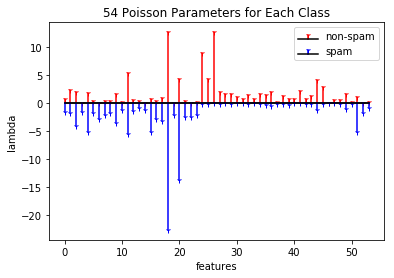

In [5]:
plt.stem(np.arange(54), lambda0, 'r', markerfmt='r1', 
         basefmt='black', label='non-spam')
plt.stem(np.arange(54), -lambda1, 'b', markerfmt='b1', 
         basefmt='black', label='spam')
plt.xlabel('features')
plt.ylabel('lambda')
plt.title('54 Poisson Parameters for Each Class')
plt.legend()
plt.show()
